<a href="https://colab.research.google.com/github/chahida-ghit/Projet_Africitizen_webscraping/blob/main/Projet_Africitizen_Webscrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJET_Africitizen_Visualutions des données

SOURCE : https://www.donneesmondiales.com/esperance-vie.php?full

DATE : Novembre 2025

Dans ce projet de webscraping, nous nous interessons à l'analyse de la dynamique de populations des pays de l'Afrique de l'Ouest en 2023.
Nous ferons donc quelques visualisations interessantes afin d'en tirer des insights et de proposer des recommendations.



##Quelques définitions de concepts

**L'espérance de vie** : indique l'âge prévu pour une personne au moment de sa naissance. Ce nombre d'années est principalement calculé à partir des taux de mortalité actuels. Mais comme ces données ne prennent en compte que le passé, elles sont complétées par des estimations qui déterminent l'âge futur en fonction d'influences extérieures. Il peut s'agir de facteurs environnementaux ou de l'évolution du système de santé. L'espérance de vie moyenne n'est donc pas une valeur mesurée, mais une prévision pour l'avenir.

**Taux de natalité**: Rapport entre le nombre de naissances vivantes sur une période donnée et la population totale moyenne de cette période, généralement exprimé pour 1 000 habitants.

**Taux de mortalité** : Rapport entre le nombre total de décès sur une période donnée et la population totale moyenne de cette période, exprimé le plus souvent pour 1 000 habitants.

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import requests
from bs4 import BeautifulSoup
import re
import os
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Configuration matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.unicode_minus'] = False

# Créer les dossiers
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/clean', exist_ok=True)
os.makedirs('data/final', exist_ok=True)
os.makedirs('visualisations', exist_ok=True)



Extraction des données brutes de tous les pays de l'Afrique de l'Ouest

In [3]:
print("\n" + "=" * 80)
print("WEB SCRAPING : www.donneesmondiales.com")
print("=" * 80)

# URL de la page
url = "https://www.donneesmondiales.com/esperance-vie.php?full"

print(f"\n📥 Téléchargement de la page : {url}")

try:
    # Télécharger la page
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
    }
    response = requests.get(url, headers=headers, timeout=15)
    response.raise_for_status()
    response.encoding = 'utf-8'

    print("✅ Page téléchargée avec succès")

    # Parser le HTML
    soup = BeautifulSoup(response.text, 'html.parser')

    # Trouver tous les tableaux
    tables = soup.find_all('table')
    print(f"📊 {len(tables)} tableau(x) trouvé(s)")

    # Pays d'Afrique de l'Ouest à rechercher
    WEST_AFRICA_COUNTRIES = [
        'Nigeria', 'Nigéria', 'Ghana', 'Sénégal', 'Senegal',
        'Côte d\'Ivoire', 'Cote d\'Ivoire', 'Mali',
        'Burkina Faso', 'Niger', 'Guinée', 'Guinea', 'Bénin', 'Benin',
        'Togo', 'Liberia', 'Libéria', 'Sierra Leone',
        'Guinée-Bissau', 'Guinea-Bissau', 'Mauritanie', 'Mauritania',
        'Gambie', 'Gambia'
    ]

    #Code ISO de ces pays de l'Afrique de l'ouest
     #CodeISO =["BJ" ,"BFA","CV", "CI", "GM", "GH", "GN", "GW", "LR", "ML", "MR", "NE", "NG", "SN", "Si",	"SL", "TG"]
    # Extraire les données
    all_data = []

    for table_idx, table in enumerate(tables):
        print(f"\n🔍 Analyse du tableau {table_idx + 1}...")

        # Extraire les lignes
        rows = table.find_all('tr')

        # Extraire les en-têtes
        headers = []
        header_row = rows[0] if rows else None
        if header_row:
            for th in header_row.find_all(['th', 'td']):
                headers.append(th.get_text(strip=True))

        if headers:
            print(f"   Colonnes : {headers[:5]}...")

        # Extraire les données
        for row in rows[1:]:
            cols = row.find_all(['td', 'th'])
            if len(cols) < 2:
                continue

            # Premier colonne = pays
            country_cell = cols[0]
            country_name = country_cell.get_text(strip=True)

            # Nettoyer le nom du pays
            country_name = re.sub(r'\s+', ' ', country_name)

            # Vérifier si c'est un pays d'Afrique de l'Ouest
            is_west_africa = any(
                wa_country.lower() in country_name.lower()
                for wa_country in WEST_AFRICA_COUNTRIES
            )

            if is_west_africa:
                row_data = {
                    'pays': country_name,
                    'table_index': table_idx
                }

                # Extraire toutes les valeurs numériques
                for i, col in enumerate(cols[1:], 1):
                    value = col.get_text(strip=True)

                    # Nettoyer et convertir
                    value = value.replace(',', '.').replace(' ', '')

                    # Extraire les nombres
                    numbers = re.findall(r'\d+[\.,]?\d*', value)
                    if numbers:
                        try:
                            numeric_value = float(numbers[0].replace(',', '.'))

                            # Déterminer le nom de la colonne
                            col_name = headers[i] if i < len(headers) else f'col_{i}'
                            row_data[col_name] = numeric_value
                        except:
                            pass

                if len(row_data) > 2:  # Si on a plus que pays et table_index
                    all_data.append(row_data)

    print(f"\n✅ {len(all_data)} entrées extraites pour l'Afrique de l'Ouest")



except requests.RequestException as e:
    print(f"\n❌ Erreur lors du téléchargement : {e}")
    print("\n💡 Création de données d'exemple...")




WEB SCRAPING : www.donneesmondiales.com

📥 Téléchargement de la page : https://www.donneesmondiales.com/esperance-vie.php?full
✅ Page téléchargée avec succès
📊 2 tableau(x) trouvé(s)

🔍 Analyse du tableau 1...
   Colonnes : ['Pays', 'Espérance de vie hommes', 'Espérance de vie femmes', 'Taux de natalité', 'Taux de mortalité']...

🔍 Analyse du tableau 2...
   Colonnes : ['Espérance de vie en Áfrique', 'Hommes', 'Femmes']...

✅ 18 entrées extraites pour l'Afrique de l'Ouest


Création du Data Frame

In [4]:
# Créer le DataFrame
if all_data:
  df = pd.DataFrame(all_data)

 # Sauvegarder les données brutes
df.to_csv('data/raw/scraped_data.csv', index=False, encoding='utf-8')

print(f"\n💾 Données sauvegardées : data/raw/scraped_data.csv")

print("\n📋 Aperçu des données :")
display(df.head(5))




💾 Données sauvegardées : data/raw/scraped_data.csv

📋 Aperçu des données :


,pays,table_index,Espérance de vie hommes,Espérance de vie femmes,Taux de natalité,Taux de mortalité
0,Sénégal,0,66.8,70.8,29.4,5.6
1,Mauritanie,0,66.5,70.5,34.4,5.5
2,Gambie,0,64.2,67.5,30.4,6.3
3,Papouasie-Nouvelle-Guinée,0,63.7,69.1,24.6,6.5
4,Ghana,0,63.1,67.9,26.3,7.0


In [5]:
#Taille des données
df.shape

(18, 6)

In [12]:
#type des données
df.dtypes

,0
pays,object
table_index,int64
Espérance de vie hommes,float64
Espérance de vie femmes,float64
Taux de natalité,float64
Taux de mortalité,float64


In [35]:
df.head(18)

,pays,table_index,Espérance de vie hommes,Espérance de vie femmes,Taux de natalité,Taux de mortalité
0,Sénégal,0,66.8,70.8,29.4,5.6
1,Mauritanie,0,66.5,70.5,34.4,5.5
2,Gambie,0,64.2,67.5,30.4,6.3
3,Papouasie-Nouvelle-Guinée,0,63.7,69.1,24.6,6.5
4,Ghana,0,63.1,67.9,26.3,7.0
5,Togo,0,62.5,62.9,31.1,7.7
6,Guinée équatoriale,0,62.0,65.7,29.6,7.9
7,Guinée-Bissau,0,61.7,66.4,30.0,7.1
8,Libéria,0,60.9,63.4,31.0,8.1
9,Niger,0,60.3,62.1,41.9,8.9


##Nettoyage des données

In [29]:
#Copy du dataframe

df1=df.copy()

In [41]:
#Supprimer les lignes de données des pays qui ne sont pas en Afrique de l'Ouest
# Cas du Somalie
df2= df1.drop(index = [16])

In [42]:
#Suprimer la colonne table_index
df2.drop(columns = 'table_index',axis=1)

,pays,Espérance de vie hommes,Espérance de vie femmes,Taux de natalité,Taux de mortalité
0,Sénégal,66.8,70.8,29.4,5.6
1,Mauritanie,66.5,70.5,34.4,5.5
2,Gambie,64.2,67.5,30.4,6.3
3,Papouasie-Nouvelle-Guinée,63.7,69.1,24.6,6.5
4,Ghana,63.1,67.9,26.3,7.0
5,Togo,62.5,62.9,31.1,7.7
6,Guinée équatoriale,62.0,65.7,29.6,7.9
7,Guinée-Bissau,61.7,66.4,30.0,7.1
8,Libéria,60.9,63.4,31.0,8.1
9,Niger,60.3,62.1,41.9,8.9


In [43]:
#Verifier s'il ya des valeurs manquantes
df2.isnull().sum()

,0
pays,0
table_index,0
Espérance de vie hommes,0
Espérance de vie femmes,0
Taux de natalité,0
Taux de mortalité,0


In [44]:

df2.describe()

,table_index,Espérance de vie hommes,Espérance de vie femmes,Taux de natalité,Taux de mortalité
count,17.0,17.000000,17.000000,17.000000,17.000000
mean,0.0,61.335294,64.576471,31.976471,7.811765
std,0.0,3.059400,3.949609,4.226927,1.486557
min,0.0,54.200000,54.700000,24.600000,5.500000
25%,0.0,59.500000,62.200000,30.000000,7.000000
50%,0.0,60.900000,63.500000,31.100000,7.900000
75%,0.0,63.100000,67.500000,33.800000,8.600000
max,0.0,66.800000,70.800000,41.900000,11.700000


In [59]:
#Ajout d'une colonne Ecart_âge
df2['Ecart_âge'] = df2['Espérance de vie femmes'] - df2['Espérance de vie hommes']
df2.head(17)

,pays,table_index,Espérance de vie hommes,Espérance de vie femmes,Taux de natalité,Taux de mortalité,Ecart_âge
0,Sénégal,0,66.8,70.8,29.4,5.6,4.0
1,Mauritanie,0,66.5,70.5,34.4,5.5,4.0
2,Gambie,0,64.2,67.5,30.4,6.3,3.3
3,Papouasie-Nouvelle-Guinée,0,63.7,69.1,24.6,6.5,5.4
4,Ghana,0,63.1,67.9,26.3,7.0,4.8
5,Togo,0,62.5,62.9,31.1,7.7,0.4
6,Guinée équatoriale,0,62.0,65.7,29.6,7.9,3.7
7,Guinée-Bissau,0,61.7,66.4,30.0,7.1,4.7
8,Libéria,0,60.9,63.4,31.0,8.1,2.5
9,Niger,0,60.3,62.1,41.9,8.9,1.8


In [63]:
moyenne_ecart_age = df2['Ecart_âge'].mean()
print("La moyenne de l'écart d'âge est :", moyenne_ecart_age)


La moyenne de l'écart d'âge est : 3.2411764705882353


##Visualisations


1. Ecart d'âge par pays

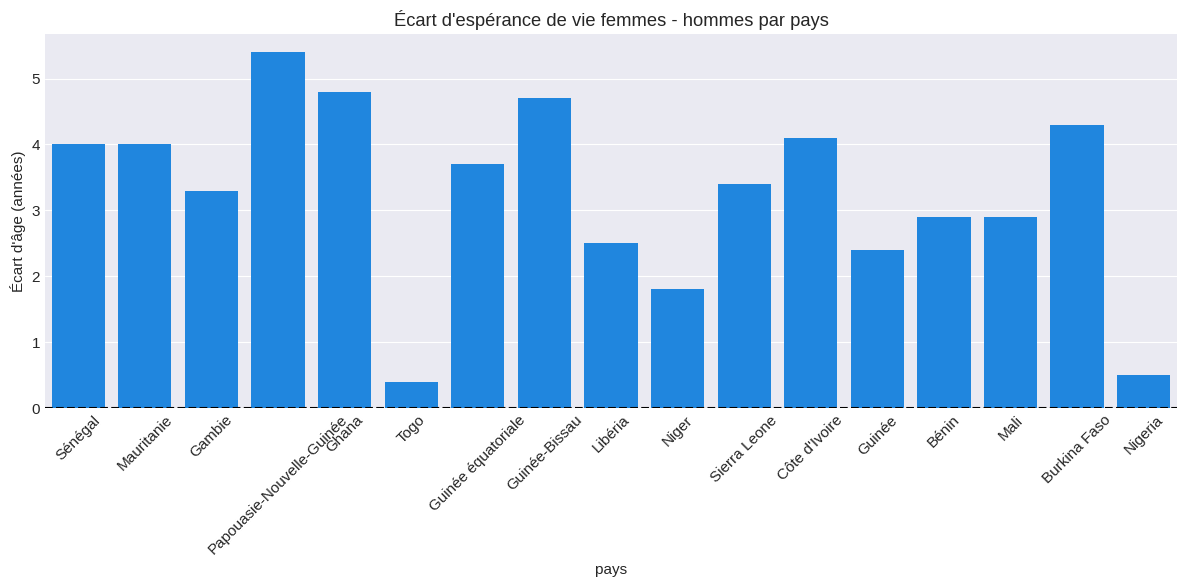

In [58]:
#Visualisation 1 : Écart d'âge (différence femmes-hommes)
# ----------------------------------------
plt.figure(figsize=(12,6))
sns.barplot(x='pays', y='Ecart_âge', data=df2, color ='#0088FE')
plt.xticks(rotation=45)
plt.ylabel("Écart d'âge (années)")
plt.title("Écart d'espérance de vie femmes - hommes par pays")
plt.axhline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()

## Insights 1

### Difference de l'espérance de vie des femmes vs celui des hommes en 2023
Dans la grande majorité des pays de l'Afrique de l'Ouest, les femmes vivent **en moyenne 3 ans** de plus que les hommes. Selon de nombreux scientifiques, il ne s'agit pas d'une différence purement biologique, mais d'une différence de comportement. Selon eux, les hommes prennent moins soin de leur corps que les femmes. En effet, les fumeurs et les consommateurs d'alcool sont plus nombreux chez les hommes.

L'écart d'âge entre les hommes et les femmes du Togo et du Nigeria en 2023 était faible par rapport à la moyenne des pays de l'Afrique de l'Ouest.



2. Taux de natalité par pays

In [80]:
# Sort by birth rate descending
df2 = df2.sort_values('Taux de natalité', ascending=False).reset_index(drop=True)

# Create line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2['pays'],
    y=df2['Taux de natalité'],
    mode='lines+markers',
    line=dict(color='#1FB8CD', width=3),
    marker=dict(size=8, color='#1FB8CD'),
    hovertemplate='%{x}<br>%{y:.1f}<extra></extra>'
))

fig.update_layout(
    title='Birth Rate by Country',
    xaxis_title='Country',
    yaxis_title='Birth Rate'
)

fig.update_xaxes(tickangle=-45)
fig.update_traces(cliponaxis=False)
fig.show()
# Save as PNG and SVG
#fig.write_image('chart.png')
#fig.write_image('chart.svg', format='svg')

###Insights 2

Le taux de natalité varie fortement selon les pays étudiés, allant d'environ 25 naissances pour 1000 habitants à plus de 40, avec le Niger et le Mali en tête. Ces taux élevés indiquent une population jeune et une forte fécondité. À l’inverse, des pays comme la Papouasie-Nouvelle-Guinée et le Ghana présentent des taux plus faibles.
La majorité des autres pays de l'Afrique de l'Ouest affichent des taux intermédiaires entre 30 et 35.
Ces disparités influencent la croissance démographique et la pression exercée sur les ressources et infrastructures.

3. Taux de mortalité par pays

In [81]:
# Sort by death rate descending
df2 = df2.sort_values('Taux de mortalité', ascending=False).reset_index(drop=True)

# Create line chart
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df2['pays'],
    y=df2['Taux de mortalité'],
    mode='lines+markers',
    line=dict(color='#1FB8CD', width=3),
    marker=dict(size=8, color='#1FB8CD'),
    hovertemplate='%{x}<br>%{y:.1f}<extra></extra>'
))

fig.update_layout(
    title='Death Rate by Country',
    xaxis_title='Country',
    yaxis_title='Death Rate'
)

fig.update_xaxes(tickangle=-45)
fig.update_traces(cliponaxis=False)

# Save as PNG and SVG
#fig.write_image('chart.png')
#fig.write_image('chart.svg', format='svg')
fig.show()

##Insights 3
Le taux de mortalité affiche des variations significatives selon les pays, allant de moins de 5 pour 1000 personnes à plus de 11 pour 1000 dans le Nigeria, qui se démarque par son taux élevé. Des pays comme le Sénégal et la Mauritanie affichent des taux de mortalité relativement bas, proches de 5 à 6 décès pour 1000 habitants.

Les pays avec des taux de mortalité plus faibles ont le plus souvent des systèmes de santé plus développés et une meilleure prise en charge.

4. Corrélations entre des variables démographiques

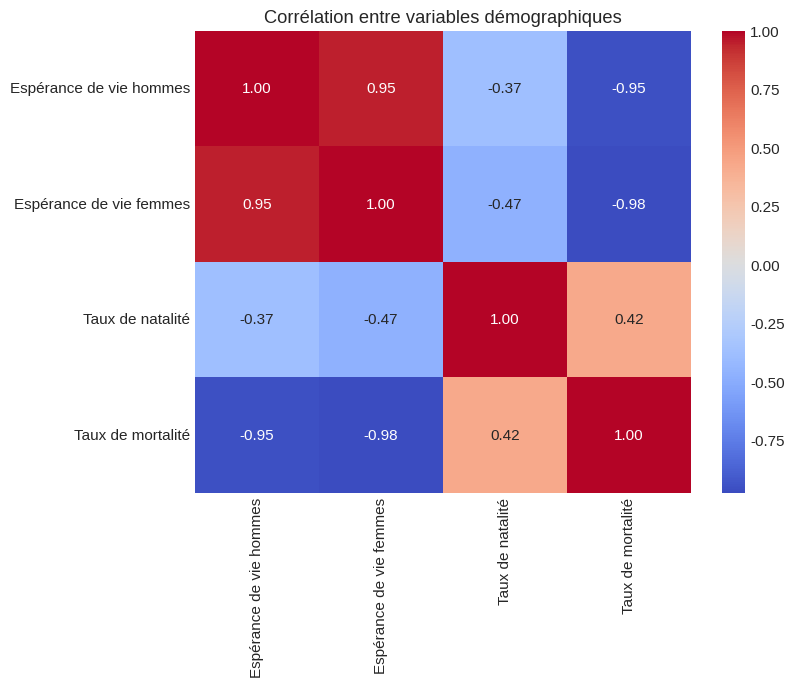

In [68]:
plt.figure(figsize=(8,6))
sns.heatmap(df2[['Espérance de vie hommes','Espérance de vie femmes','Taux de natalité','Taux de mortalité']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre variables démographiques")
plt.show()


##Insights 4

La corrélation entre Espérance de vie hommes vs femmes est très élevée (0,95).Ce qui montre que les conditions de vie affectent globalement les deux genres de manière similaire.



La corrélation entre Espérance de vie(hommes ou femmes) vs taux de mortalité est fortement négative .
Les pays où le taux de mortalité est élevé ont une espérance de vie des hommes (ou des femmes) très faible.



5. Espérance de vie des hommes vs taux de mortalité par pays

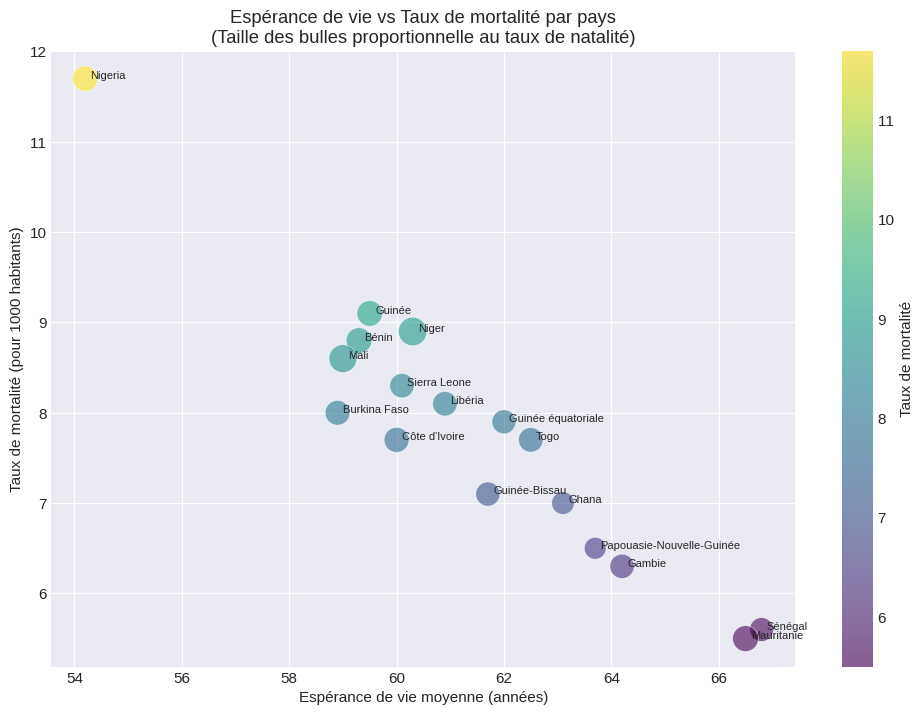

In [76]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    df2['Espérance de vie hommes'],
    df2['Taux de mortalité'],
    s=[n * 10 for n in df2['Taux de natalité']], # Utilisation de df2 et référence correcte à la colonne
    alpha=0.6,
    c=df2['Taux de mortalité'], # Utilisation de df2 et référence correcte à la colonne
    cmap='viridis',
    edgecolors='w',
    linewidth=0.5
)

plt.colorbar(scatter, label="Taux de mortalité")
plt.xlabel("Espérance de vie moyenne (années)")
plt.ylabel("Taux de mortalité (pour 1000 habitants)")
plt.title("Espérance de vie vs Taux de mortalité par pays\n(Taille des bulles proportionnelle au taux de natalité)")

# Ajouter le label des pays
for i, txt in enumerate(df2['pays']):
    plt.text(
        df2['Espérance de vie hommes'].iloc[i] + 0.1, # Accès correct aux valeurs via iloc
        df2['Taux de mortalité'].iloc[i],             # Accès correct aux valeurs via iloc
        txt,
        fontsize=8
    )

plt.grid(True)
plt.show()

##Insights 5
Certains pays comme le Niger et Guinée-Equatoriale montrent une espérance de vie moyenne relativement élevée (>60 ans) malgré un taux de mortalité élevé (>7 pour 1000), ce qui suggère une mortalité concentrée dans certaines tranches d'âge.
Les différences d'espérance de vie chez les hommes et les femmes entre pays avec des taux similaires indiquent la complexité démographique et sanitaire au-delà d’indicateurs considérés ici.

##Recommendations générales

1. Prioriser la réduction de la mortalité infantile et adulte pour augmenter l’espérance de vie.


2. Programmes d’éducation et de planification familiale : Développer l’éducation sexuelle et faciliter l’accès à la contraception pour maîtriser la forte natalité, équilibrer la croissance démographique et réduire la pression sur les ressources.

3. Campagnes de sensibilisation sur santé masculine

*   ✅ Programmes de prévention accidents du travail et routiers
*   ✅ Lutte contre alcoolisme et tabagisme (taxes, interdictions publicité)





4. Amélioration des conditions socio-économiques : Stimuler les investissements dans l’éducation, l’emploi des jeunes et les infrastructures pour accompagner une population jeune et en forte croissance.
